In [1]:
from pathlib import Path
from glob import glob
import os
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
import imutils
%matplotlib inline

In [3]:
#Setting up working directory
if os.path.basename(os.getcwd()) != "Ships_DetectionRT":
    working_dir = str(Path(os.getcwd()).parent)
    
if os.path.exists(working_dir):
    os.chdir(working_dir)
    print("pwd: " + working_dir)
else:
    assert("Desired working directory doesn't exist")
    

pwd: /home/corcasta/Ships_DetectionRT


In [8]:
#Loading trained weights
weights = sorted(glob("best.pt"))

best_weights = weights[0]
#last_weights = weights[1]
#coco_weights = best[2]

#Loading Test dataset
test_imgs = sorted(glob(os.path.join(str(Path(os.getcwd()).parent.parent), "datasets", "test", "images", "*")))


#Model Instance
model = YOLO(best_weights)

# Image Demo

In [28]:
test_imgs = sorted(glob(str(os.path.join(str(Path(os.getcwd()).parent.parent)))+"/test_ship1.webp"))

In [29]:
number = -1

In [30]:
#Instead of using "model.predict" use "model.track" generates the same output
#with the addition of a tracking id 
results = model.track(test_imgs[number])
for r in results:
    # detection
    r.boxes.xyxy   # box with xyxy format, (N, 4)
    r.boxes.xywh   # box with xywh format, (N, 4)
    r.boxes.xyxyn  # box with xyxy format but normalized, (N, 4)
    r.boxes.xywhn  # box with xywh format but normalized, (N, 4)
    r.boxes.conf   # confidence score, (N, 1)
    r.boxes.cls    # cls, (N, 1)
    #r.boxes.id    #Only if tracker used


image 1/1 /home/corcasta/Ships_DetectionRT/test_ship1.webp: 448x640 3 ships, 184.7ms
Speed: 1.4ms preprocess, 184.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


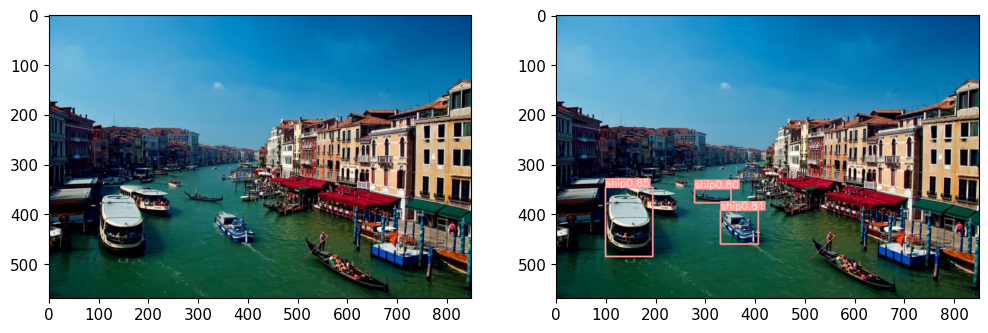

In [31]:
plt.figure(figsize=(12,8))
plt.subplot(1, 2, 1)
img = cv2.imread(test_imgs[number])
plt.imshow(img[:,:,::-1])


plt.subplot(1, 2, 2)
res_plotted = results[0].plot()
plt.imshow(res_plotted[:,:,::-1], )
plt.show()

# Video DEMO

In [5]:
video = os.path.join(working_dir, "videos", "singapore_demo.mp4")

In [ ]:
#model.predict() #Small bug, we need to call first model.predict before starting tracking
results = model.track(video, conf=0.40, show=True)
#print(results)


video 1/1 (1/6266) /home/corcasta/Ships_DetectionRT/videos/singapore_demo.mp4: 384x640 (no detections), 83.0ms
video 1/1 (2/6266) /home/corcasta/Ships_DetectionRT/videos/singapore_demo.mp4: 384x640 (no detections), 58.3ms
video 1/1 (3/6266) /home/corcasta/Ships_DetectionRT/videos/singapore_demo.mp4: 384x640 (no detections), 72.0ms
video 1/1 (4/6266) /home/corcasta/Ships_DetectionRT/videos/singapore_demo.mp4: 384x640 (no detections), 68.6ms
video 1/1 (5/6266) /home/corcasta/Ships_DetectionRT/videos/singapore_demo.mp4: 384x640 1 ship, 67.8ms
video 1/1 (6/6266) /home/corcasta/Ships_DetectionRT/videos/singapore_demo.mp4: 384x640 1 ship, 65.2ms
video 1/1 (7/6266) /home/corcasta/Ships_DetectionRT/videos/singapore_demo.mp4: 384x640 1 ship, 67.7ms
video 1/1 (8/6266) /home/corcasta/Ships_DetectionRT/videos/singapore_demo.mp4: 384x640 1 ship, 67.9ms
video 1/1 (9/6266) /home/corcasta/Ships_DetectionRT/videos/singapore_demo.mp4: 384x640 1 ship, 69.7ms
video 1/1 (10/6266) /home/corcasta/Ships_Dete

KeyboardInterrupt: 